# Visualizing Graphs

- Basic NetworkX & Matplotlib (`nx.draw`)
- Detailed Plotting w/ Networkx & Matplotlib
    - Plotting attributes
    
<center><img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2015/07/Disney-strategy-chart-from-1957.jpg" width="540"></center>

Vizualizing networks is a complicated problem -- how do you position the nodes and edges in a way such that no nodes overlap, connected nodes are near each other, none of the labels overlap? Typically we use what is called a *layout* to plot or visualize networks. A layout is an algorithm used to position nodes and edges on a plot automatically in aesthetically and informationally satisfactory ways.

There are several different layout algorithms, but the most common is a *force-directed* layout. These layout algorithms are based off of physical repulsion and spring systems. In general, the rule for force-directed layouts is: repel all nodes, and model connections between nodes as 'springs', with the result that more connected nodes will be closer together.

One important issue is that each layout typically has random initial conditions. Running a plot function twice will return two different plots, both following the rules of the algorithm, but differing due to the initial conditions of the layout.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GA = nx.read_gexf('../data/ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


## NetworkX with Matplotlib

Pros:
- Easy
- Some customization

Cons:
- Looks "dated" (not great for publication / productizing)
- Not interactive
- Few Layout Options

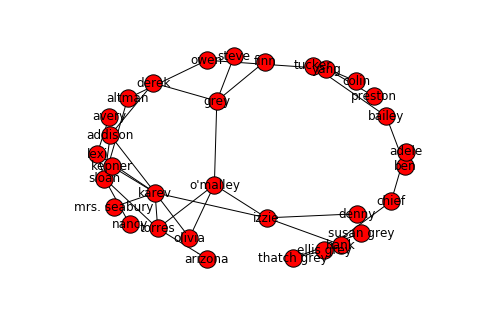

In [3]:
# Easiest Way
nx.draw(GA, with_labels=True)

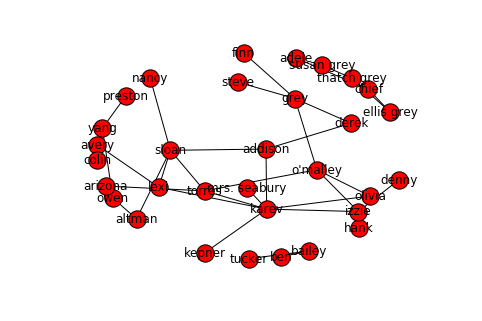

In [4]:
# Graph Layouts are random...
nx.draw(GA, with_labels=True)

## NetworkX Detailed Plotting

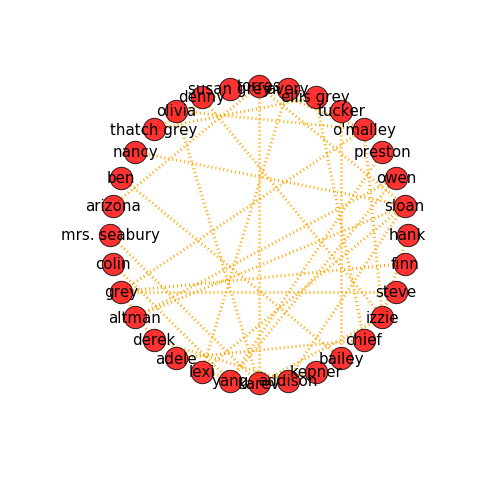

In [5]:
# Some matplotlib options
plt.figure(figsize=(8,8))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()

## Detailed Plotting with Colors by Attribute

In [6]:
from seaborn import color_palette, set_style, palplot

In [7]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

![spoiler alert](http://funnyand.com/wp-content/uploads/2014/09/Spoiler-Alert.jpg)
``` python
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'sloan' : 'dead',
    ...
    'finn' : 'alive'
    }
``` 

In [8]:
# apply the dead_or_alive mapping of desceased characters

nx.set_node_attributes(GA, 'status', dead_or_alive)

In [9]:
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.node[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [10]:
node_colors, color_map, palette = create_color_map(GA, 'status')

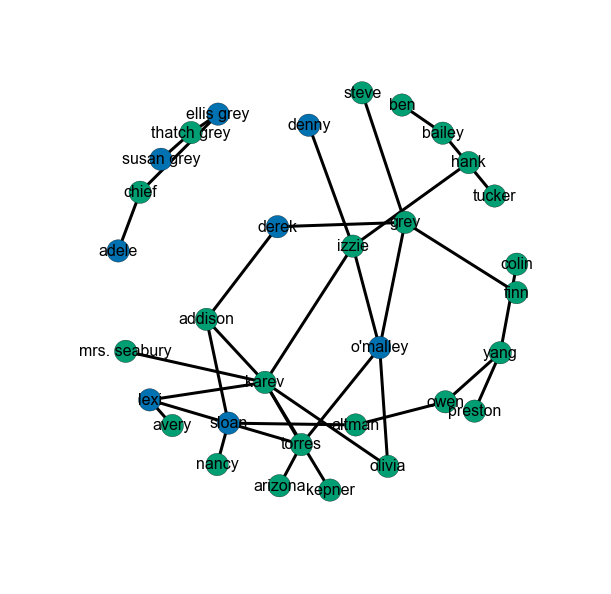

{'dead': '#0072b2', 'alive': '#009e73'}


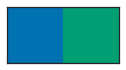

In [11]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(GA, pos=layout, font_size=16)
nx.draw_networkx_edges(GA, layout, width=3)

plt.show()

# legend
print(color_map)
palplot(palette)

## Other Visualization Options
- [Plot.ly](https://plot.ly/ipython-notebooks/network-graphs/#)
- [d3](https://bl.ocks.org/mbostock/4062045)
- [Gephi](https://gephi.org/)
- [Cytoscape / cyREST](https://github.com/idekerlab/vizbi-2015)
- [python-igraph](http://igraph.org/python/)